In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
country = pd.read_csv('/content/cleaned_global_country_development.csv')

In [ ]:
country.head()

,country,average_score,safety_and_security,personal_freedom,governance,social_capital,economic_quality,living_conditions,health,education,natural_environment
0,Denmark,84.55,92.59,94.09,89.45,82.56,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,79.71,94.66,82.11,87.72,73.60


In [4]:
uni = pd.read_csv('/content/cleaned_world_university_rank.csv')

In [5]:
uni.head()

,university_rank,university_name,country,total_students,students_per_staff,international_students_percentage,gender_ratio
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60


In [6]:
import seaborn as sns

In [ ]:
# Focused Analysis for Top 10 Countries by Average Score
top_countries = country.sort_values(by='average_score', ascending=False).head(10)

/var/folders/sq/7h8lk7x55mj3t69mj22_9t9h0000gn/T/ipykernel_30409/3911922010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='country', y='average_score', palette='viridis')


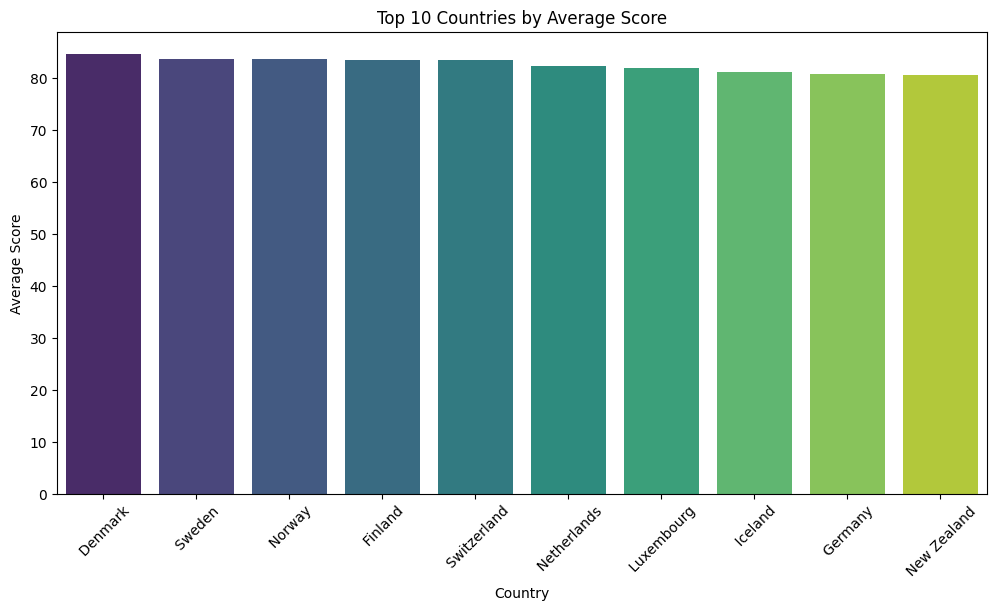

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='country', y='average_score', palette='viridis')
plt.title('Top 10 Countries by Average Score')
plt.ylabel('Average Score')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

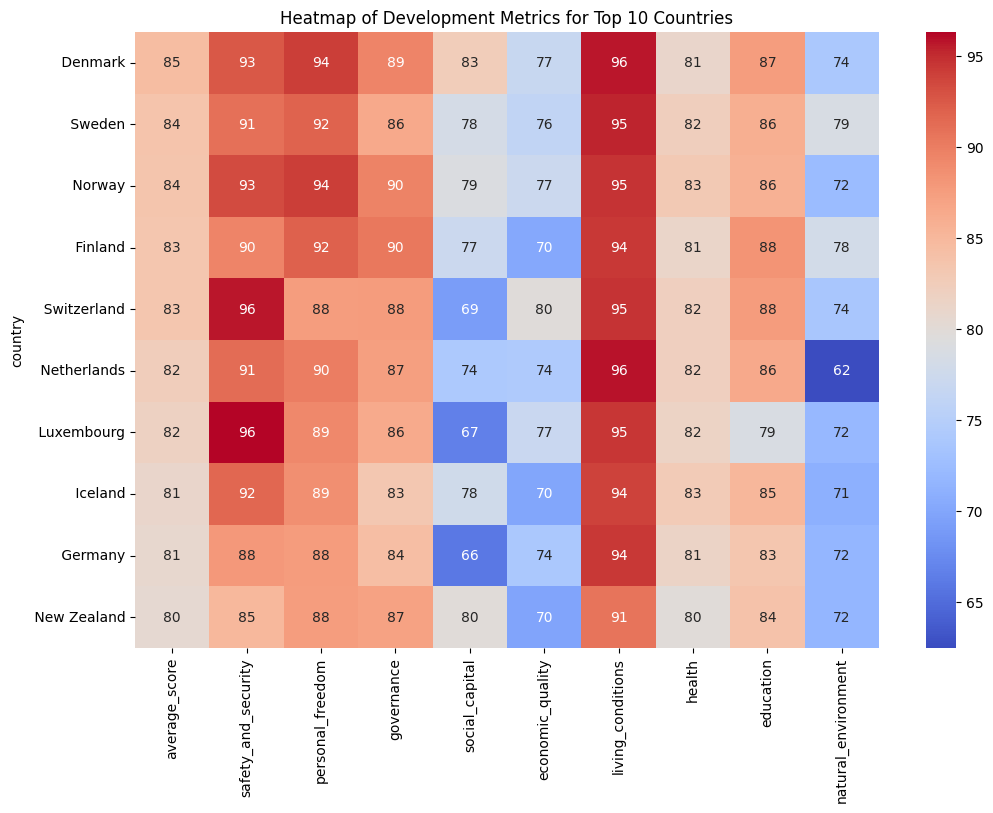

In [ ]:
# Heatmap for Key Metrics of Top 10 Countries
plt.figure(figsize=(12, 8))
sns.heatmap(top_countries.drop(columns=['country']).set_index(top_countries['country']), annot=True, cmap='coolwarm')
plt.title('Heatmap of Development Metrics for Top 10 Countries')
plt.show()

0


/var/folders/sq/7h8lk7x55mj3t69mj22_9t9h0000gn/T/ipykernel_30409/311183968.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_universities, x='university_name', y='international_students_percentage', palette='muted')


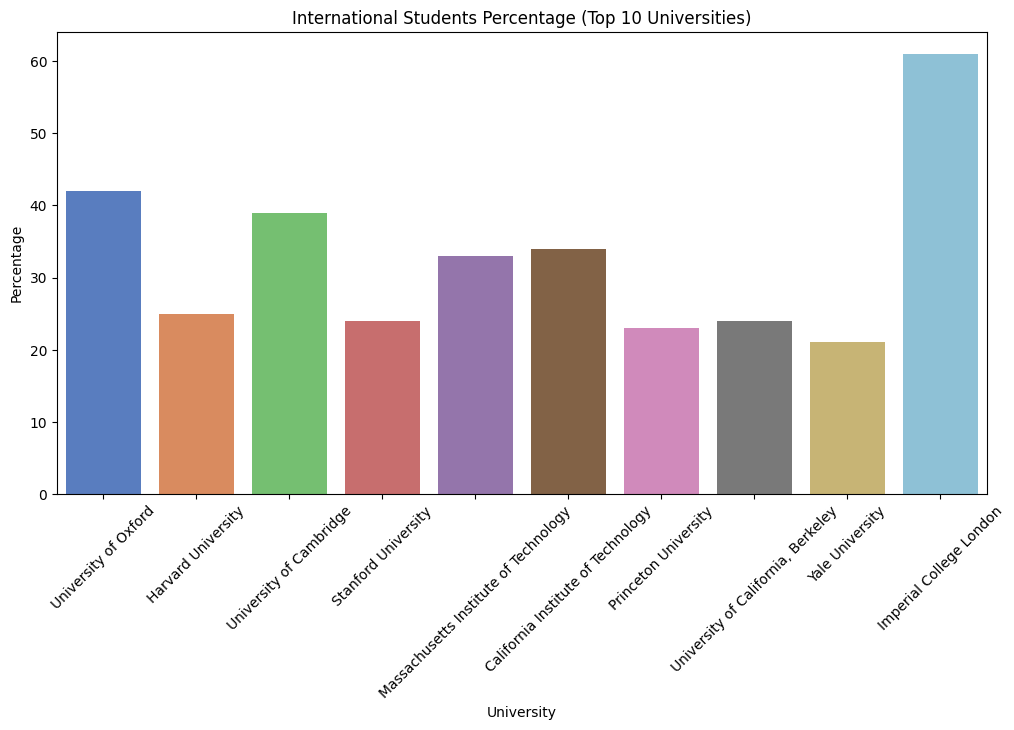

In [ ]:
# Replace empty strings or invalid entries with NaN
uni['international_students_percentage'] = (
    uni['international_students_percentage']
    .str.rstrip('%')
    .replace('', '0')
    .astype(float)
)

print(uni['international_students_percentage'].isna().sum())

top_universities = uni.head(10)

# visualization: international students percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=top_universities, x='university_name', y='international_students_percentage', palette='muted')
plt.title('International Students Percentage (Top 10 Universities)')
plt.ylabel('Percentage')
plt.xlabel('University')
plt.xticks(rotation=45)
plt.show()


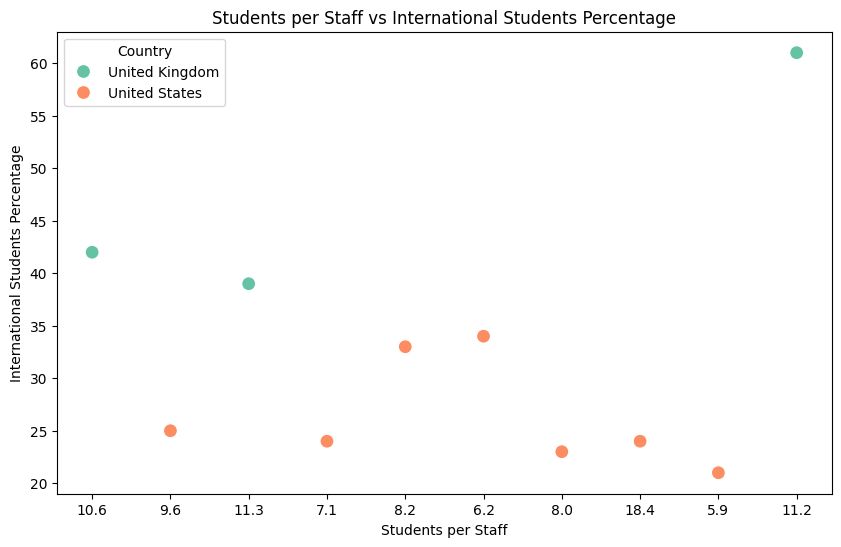

In [ ]:
# students per staff vs international students percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_universities, x='students_per_staff', y='international_students_percentage', hue='country', s=100, palette='Set2')
plt.title('Students per Staff vs International Students Percentage')
plt.xlabel('Students per Staff')
plt.ylabel('International Students Percentage')
plt.legend(title='Country')
plt.show()

/var/folders/sq/7h8lk7x55mj3t69mj22_9t9h0000gn/T/ipykernel_30409/760767287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_universities['female_ratio'], top_universities['male_ratio'] = zip(


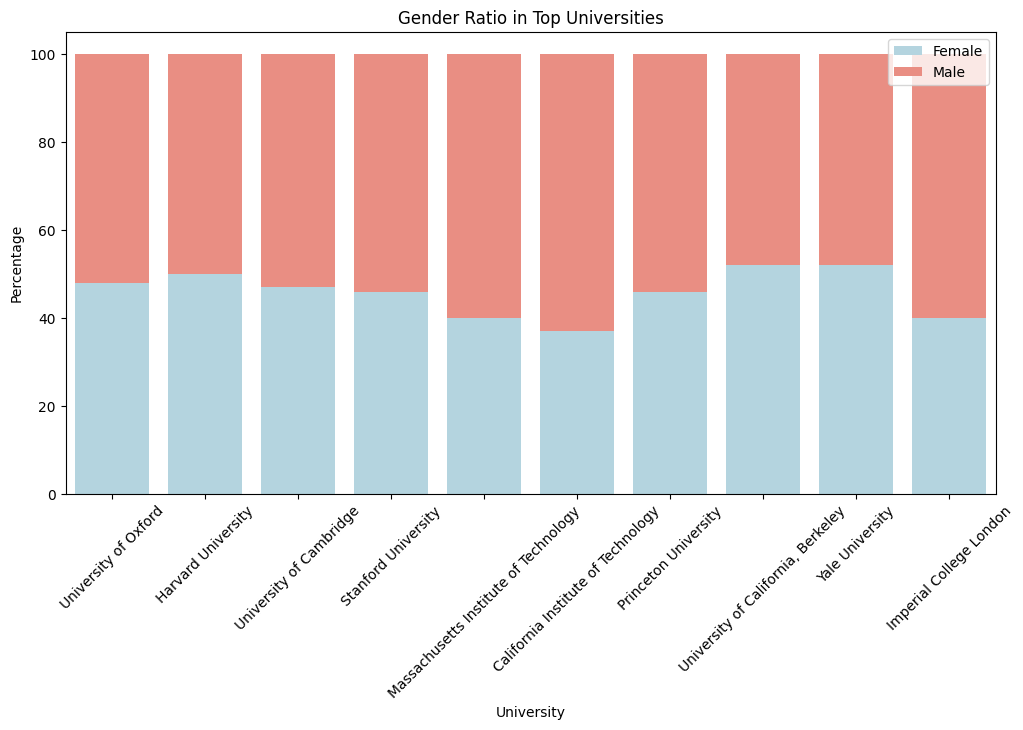

In [ ]:
# Gender Ratio Breakdown for Top Universities
top_universities['female_ratio'], top_universities['male_ratio'] = zip(
    *top_universities['gender_ratio'].str.split(' : ').apply(lambda x: (int(x[0]), int(x[1]))))

plt.figure(figsize=(12, 6))
sns.barplot(data=top_universities, x='university_name', y='female_ratio', label='Female', color='lightblue')
sns.barplot(data=top_universities, x='university_name', y='male_ratio', label='Male', bottom=top_universities['female_ratio'], color='salmon')
plt.title('Gender Ratio in Top Universities')
plt.ylabel('Percentage')
plt.xlabel('University')
plt.xticks(rotation=45)
plt.legend()
plt.show()

/var/folders/sq/7h8lk7x55mj3t69mj22_9t9h0000gn/T/ipykernel_30409/3079480706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_universities['total_students'] = top_universities['total_students'].str.replace(',', '').astype(int)
/var/folders/sq/7h8lk7x55mj3t69mj22_9t9h0000gn/T/ipykernel_30409/3079480706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_universities, x='university_name', y='total_students', palette='coolwarm')


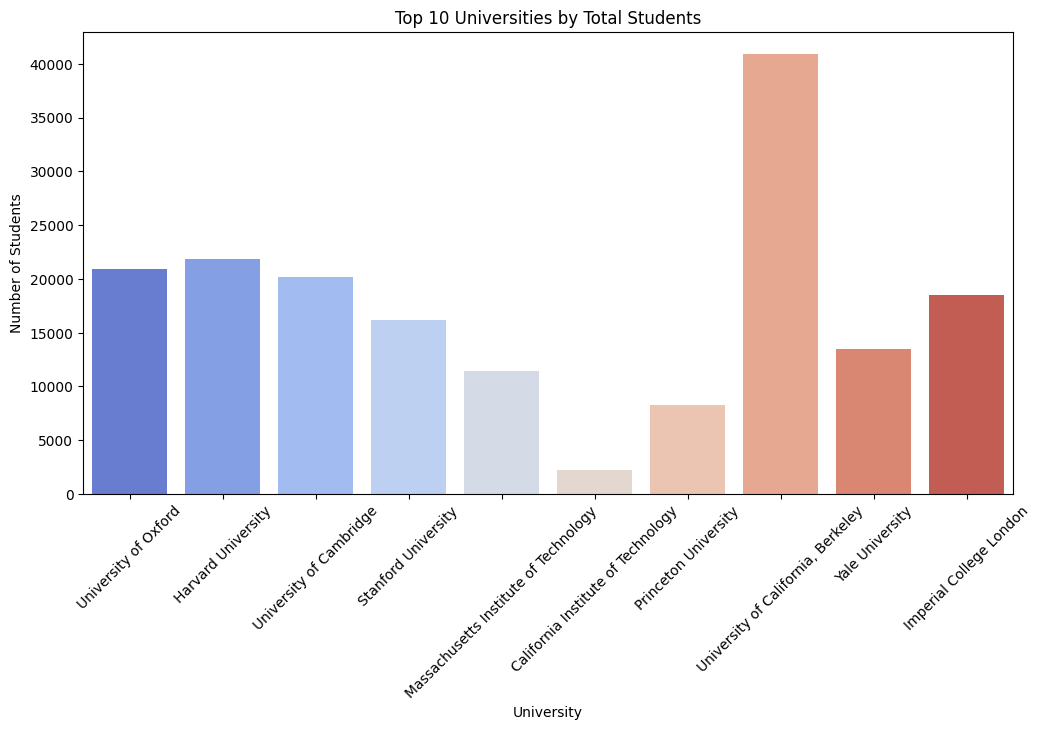

In [ ]:
# Convert total_students to integers (removing commas)
top_universities['total_students'] = top_universities['total_students'].str.replace(',', '').astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_universities, x='university_name', y='total_students', palette='coolwarm')
plt.title('Top 10 Universities by Total Students')
plt.ylabel('Number of Students')
plt.xlabel('University')
plt.xticks(rotation=45)
plt.show()

In [ ]:
avg_students_per_staff = uni.groupby('country')['students_per_staff'].mean().reset_index()

# Filter to keep only countries present in both datasets
common_countries = set(country['country']).intersection(set(uni['country']))
country_data = country[country['country'].isin(common_countries)]
uni_data = uni[uni['country'].isin(common_countries)]

merged_metrics = pd.merge(country_data, avg_students_per_staff, on='country', how='inner')

print("Merged Dataset:")
print(merged_metrics.head())


Merged Dataset:
Empty DataFrame
Columns: [country, average_score, safety_and_security, personal_freedom, governance, social_capital, economic_quality, living_conditions, health, education, natural_environment, students_per_staff]
Index: []


In [ ]:
# Debugging avg_students_per_staff
print("Average Students per Staff:")
print(avg_students_per_staff.head())

Average Students per Staff:
     country  students_per_staff
0    Albania           16.200000
1    Algeria           20.383333
2  Argentina           20.400000
3    Armenia            8.700000
4  Australia           30.278378


In [ ]:
# Inspect unique country names in each dataset
print("Unique countries in country_data:")
print(country['country'].unique())

print("\nUnique countries in uni_data:")
print(uni['country'].unique())


Unique countries in country_data:
['denmark' 'sweden' 'norway' 'finland' 'switzerland' 'netherlands'
 'luxembourg' 'iceland' 'germany' 'new zealand' 'ireland' 'united kingdom'
 'canada' 'austria' 'australia' 'japan' 'singapore' 'belgium'
 'united states' 'taiwan' 'estonia' 'hong kong' 'france' 'spain'
 'czech republic' 'portugal' 'slovenia' 'malta' 'south korea' 'italy'
 'latvia' 'lithuania' 'israel' 'cyprus' 'slovakia' 'chile' 'poland'
 'uruguay' 'costa rica' 'greece' 'croatia' 'hungary' 'malaysia'
 'united arab emirates' 'romania' 'qatar' 'mauritius' 'bulgaria'
 'montenegro' 'panama' 'seychelles' 'serbia' 'georgia' 'china' 'macedonia'
 'trinidad and tobago' 'jamaica' 'argentina' 'peru' 'kuwait' 'armenia'
 'bahrain' 'indonesia' 'thailand' 'albania' 'brazil' 'oman'
 'dominican republic' 'kazakhstan' 'moldova' 'mexico'
 'bosnia & herzegovina' 'vietnam' 'ukraine' 'south africa' 'paraguay'
 'russia' 'belarus' 'saudi arabia' 'cabo verde' 'colombia' 'suriname'
 'botswana' 'philippines' 'ecu

In [7]:
country_name_mapping = {
    # Standardizing capitalization and formatting
    'united states': 'united states',
    'united kingdom': 'united kingdom',
    'south korea': 'korea, republic of',
    'north korea': 'korea, democratic republic of',
    'bosnia & herzegovina': 'bosnia and herzegovina',
    'côte d\'ivoire': 'ivory coast',
    'são tomé and príncipe': 'sao tome and principe',
    'congo (democratic republic)': 'congo',
    'brunei darussalam': 'brunei',
    'macedonia': 'north macedonia',
    'macao': 'macau',
    'gambia': 'the gambia',
    'cape verde': 'cabo verde',
    'laos': 'lao pdr',
    'timor-leste': 'east timor',
    'palestine': 'palestinian territories',
    'viet nam': 'vietnam',
    'bolivia': 'bolivia (plurinational state of)',
    'venezuela': 'venezuela (bolivarian republic of)',
    'russia': 'russian federation',
    'iran': 'iran (islamic republic of)',
    'syria': 'syrian arab republic',
    'moldova': 'republic of moldova',
    'tanzania': 'united republic of tanzania',
    'congo': 'congo (democratic republic)',
    'eswatini': 'swaziland',
    # Add other mappings as necessary
}


In [ ]:
# Apply the mapping to both datasets
country_data['country'] = country_data['country'].replace(country_name_mapping)
uni_data['country'] = uni_data['country'].replace(country_name_mapping)

# Filter common countries again
common_countries = set(country_data['country']).intersection(set(uni_data['country']))
country_data = country_data[country_data['country'].isin(common_countries)]
uni_data = uni_data[uni_data['country'].isin(common_countries)]

# Retry merging
merged_metrics = pd.merge(country_data, avg_students_per_staff, on='country', how='inner')

# Check the merged dataset
print("Merged Dataset:")
print(merged_metrics.head())

# Proceed with visualizations if merged dataset is not empty
if not merged_metrics.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_metrics, x='average_score', y='students_per_staff', hue='country', palette='tab10', s=100)
    plt.title('Development Score vs Students per Staff')
    plt.xlabel('Country Average Development Score')
    plt.ylabel('Average Students per Staff')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("Merged dataset is still empty. Further debugging required.")


Merged Dataset:
Empty DataFrame
Columns: [country, average_score, safety_and_security, personal_freedom, governance, social_capital, economic_quality, living_conditions, health, education, natural_environment, students_per_staff]
Index: []
Merged dataset is still empty. Further debugging required.
